In [1]:
#sql toolbox
import sqlite3

#create table
conn = sqlite3.connect('mobility.db')



import csv
import pandas as pd
import numpy as np
from scipy import interpolate 
import matplotlib.pyplot as plt
filename = "Raw_data_csv.csv"

In [2]:
def csv_state_tables_list(filename):
    tables = []
    with open(filename , 'r') as csvfile:
        #create csv reader object
        csv_Readout = csv.reader(csvfile)
        #start
        #skip first row of col
        next(csv_Readout)
        for i in csv_Readout:
            if (i[1] != 'DC' and i[1] not in tables):
                tables.append(i[1])
    return tables


In [3]:
# 1 create db of csv data:
def create_table_cohort():
    curs = conn.cursor()
    aq = """CREATE TABLE cohorts(state TEXT, cohort INTEGER, cohort_mean REAL)"""
    curs.execute(aq)


In [4]:
#loads data into db
def load_csv_to_chohorts_db():
    with open(filename, 'r') as csvfile:
        csv_Readout = csv.reader(csvfile)
        next(csv_Readout)
        for data in csv_Readout:
            if data[1] == 'DC':
                continue
            aq = """INSERT INTO cohorts(state, cohort, cohort_mean)
                    VALUES ('%s', '%s', '%s')""" %(data[1],data[2],data[3])
            cur = conn.cursor()
            cur.execute(aq)
            conn.commit()


In [5]:
#creates dic of cohorts collected
def states_date():
    state_List = {tables : [] for tables in csv_state_tables_list(filename)}
    with open(filename, 'r') as csvfile:
        csv_Readout = csv.reader(csvfile)
        next(csv_Readout)
        for i in csv_Readout:
            if i[1] != 'DC':
                a = i[1]
                state_List[a].append(int(i[2]))
            else:
                continue
    return state_List

In [6]:
def state_list():
    return [states for states in states_date()]

In [7]:
def null_Cohorts_Add():
    expt_Cohorts = [1940, 1950, 1960, 1970, 1980]
    for states in states_date():
        if list(set(expt_Cohorts)-set(states_date()[states])) != []:
            for missing in list(set(expt_Cohorts)-set(states_date()[states])):
                aq = """INSERT INTO cohorts(state, cohort, cohort_mean)
                        VALUES ('%s', '%s', '%s')""" %(states,missing, None)
                cur = conn.cursor()
                cur.execute(aq)
                conn.commit()



In [8]:
def create_sorted_cohorts():
    aq = """CREATE TABLE cohorts_sorted(state TEXT, cohort INTEGER, cohort_mean REAL)"""
    cur = conn.cursor()
    cur.execute(aq)
    aq = """INSERT INTO cohorts_sorted ('state', 'cohort', 'cohort_mean')
    SELECT *
    FROM cohorts
    ORDER BY state,cohort ASC;"""
    cur.execute(aq)
    conn.commit()
    aq2 = """UPDATE cohorts_sorted
            SET cohort_mean = NULL
            WHERE cohort_mean = 'None';
            """ 
    cur.execute(aq2)
    conn.commit()
 


In [9]:
def data_base_null_fill():    
    df = pd.read_sql("SELECT state,cohort,cohort_mean FROM cohorts_sorted",conn)
    df = df.interpolate()
    for index, row in df.iterrows():
        q = "UPDATE cohorts_sorted SET cohort_mean = %s WHERE state = '%s' AND cohort = %d"%(row['cohort_mean'],row['state'],row['cohort'])
        curr.execute(q)
        conn.commit()
    

In [10]:
csv_state_tables_list(filename)
create_table_cohort()
load_csv_to_chohorts_db()
states_date()
null_Cohorts_Add()
# sort_New_Data()
create_sorted_cohorts()
# data_base_null_fill()

In [11]:
import sqlite3
import pandas as pd


conn = sqlite3.connect('mobility.db')
cur = conn.cursor() 
df = pd.read_sql_query("select * from cohorts_sorted", conn)
df['cohort_mean'][1:10]

1      NaN
2    0.572
3    0.450
4    0.379
5    0.920
6    0.818
7    0.645
8    0.639
9    0.519
Name: cohort_mean, dtype: float64

In [12]:
conn = sqlite3.connect('mobility.db')
df = pd.read_sql_query("select * from cohorts_sorted", conn)
df=df[105:110]
x=df['cohort'].values.tolist()
y=df['cohort_mean'].values.tolist()
predictedlist=[]
dates=[1990,2000,2010,2020]
n = 5
final = [y[i * n:(i + 1) * n] for i in range((len(y) + n - 1) // n )]  
for j in range(len(final)):
    decade = [1940,1950,1960,1970,1980]
    listeach=final[j]
    d = interpolate.interp1d(decade, listeach, kind='quadratic', fill_value = "extrapolate")
    for i in dates:
        pred=d(i)
        predictedlist.append(float(pred))
    print(predictedlist)
#     print(df)
# plot(predictedlist)

[0.11954285731428582, -0.42737141005714285, -1.1837428151142868, -2.149571357857142]


Text(0.5, 1.0, 'Michigan: Predictions')

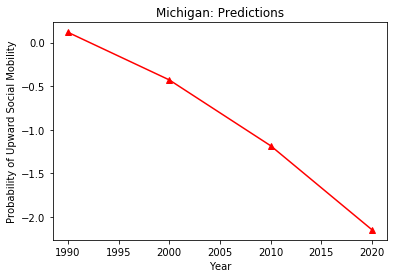

In [13]:
dates=[1990,2000,2010,2020]
dec=[1940,1950,1960,1970,1980]
df1=list(df)
df1
# predlist1=predictedlist[0:5]
# predlist1
state=list(df['cohort_mean'])

# state
# alaska1.append(predictedlist[0])
# plt.plot(dec,state)
# plt.xlabel('Year')
# plt.ylabel('Probability of Upward Social Mobility')
# plt.title('New York')




plt.plot(dates,predictedlist,marker="^",color='r')
plt.xlabel('Year')
plt.ylabel('Probability of Upward Social Mobility')
plt.title('Michigan: Predictions')

# plt.plot(1990,predictedlist[0],marker="^")